<a href="https://colab.research.google.com/github/SeyfGoumeida/Time_series_Unsupervised_Learning/blob/main/unsupervised_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préparation de l'environnement 

In [103]:
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
#!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from sklearn.decomposition import PCA

#!pip install fuzzy-c-means
from fcmeans import FCM

#!pip install sklearn_extra
from sklearn_extra.cluster import KMedoids

plt.rcParams.update({'figure.figsize': (7, 7), 'figure.dpi': 60})



In [59]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

def accuracy(true_row_labels, predicted_row_labels):
    cm = confusion_matrix(true_row_labels, predicted_row_labels)
    # deprecated: indexes = linear_assignment(_make_cost_m(cm))
    indexes = linear_sum_assignment(_make_cost_m(cm))
    total = 0
    for row, column in zip(*indexes):
        value = cm[row][column]
        total += value

    return (total * 1. / np.sum(cm))

# Chargement de données : 

In [61]:
acce_x = pd.read_csv('acce_x.txt', sep=" ", header=None)
acce_y = pd.read_csv('acce_y.txt', sep=" ", header=None)
acce_z = pd.read_csv('acce_z.txt', sep=" ", header=None)
accm_x = pd.read_csv('accm_x.txt', sep=" ", header=None)
accm_y = pd.read_csv('accm_y.txt', sep=" ", header=None)
accm_z = pd.read_csv('accm_z.txt', sep=" ", header=None)
vit_x = pd.read_csv('vit_x.txt', sep=" ", header=None)
vit_y = pd.read_csv('vit_y.txt', sep=" ", header=None)
vit_z = pd.read_csv('vit_z.txt', sep=" ", header=None)
lab = pd.read_csv('lab.txt', sep=" ", header=None)
for i in range(0,len(acce_x)):
  acce_x.rename(columns={i: 'acce_x'+str(i)} ,inplace=True)
  acce_y.rename(columns={i: 'acce_y'+str(i)} ,inplace=True)
  acce_z.rename(columns={i: 'acce_z'+str(i)} ,inplace=True)
  accm_x.rename(columns={i: 'accm_x'+str(i)} ,inplace=True)
  accm_y.rename(columns={i: 'accm_y'+str(i)} ,inplace=True)
  accm_z.rename(columns={i: 'accm_z'+str(i)} ,inplace=True)
  vit_x.rename(columns={i: 'vit_x'+str(i)} ,inplace=True)
  vit_y.rename(columns={i: 'vit_y'+str(i)} ,inplace=True)
  vit_z.rename(columns={i: 'vit_z'+str(i)} ,inplace=True)
  lab.rename(columns={i: 'lab'+str(i)} ,inplace=True)
  

true_labels = lab['lab0'].values

## Construction du DF_MEAN (moyenne de chaque variable mesurée)

In [62]:
acce_x_mean = acce_x.mean(axis=1)
acce_y_mean = acce_y.mean(axis=1)
acce_z_mean = acce_z.mean(axis=1)
accm_x_mean = accm_x.mean(axis=1)
accm_y_mean = accm_y.mean(axis=1)
accm_z_mean = accm_z.mean(axis=1)
vit_x_mean = vit_x.mean(axis=1)
vit_y_mean = vit_y.mean(axis=1)
vit_z_mean = vit_z.mean(axis=1)

#-------------------------------------------

frames = [acce_x_mean, acce_y_mean,acce_z_mean,accm_x_mean,accm_y_mean,accm_z_mean,vit_x_mean,vit_y_mean,vit_z_mean]
df_mean = pd.concat(frames,axis=1)
df_mean = df_mean.set_axis(['0', '1', '2','3','4','5','6','7','8'], axis=1)
df_mean

,0,1,2,3,4,5,6,7,8
0,0.002269,-0.001655,-0.008126,1.019305,-0.124262,0.099732,0.022250,0.019403,0.009468
1,0.000174,0.000382,-0.005025,1.019448,-0.122936,0.096939,0.011926,-0.004314,0.006308
2,0.000428,-0.001222,-0.001703,1.019927,-0.124997,0.092897,-0.004150,-0.012640,0.004335
3,0.000329,-0.004753,-0.004947,1.020349,-0.130493,0.087654,-0.016228,-0.007697,-0.000352
4,-0.000195,0.000298,-0.002330,1.020255,-0.130209,0.084999,-0.006483,-0.000166,-0.003957
...,...,...,...,...,...,...,...,...,...
342,-0.003632,-0.002907,0.001992,0.984560,-0.281641,-0.115265,-0.087613,0.027596,-0.000004
343,-0.015198,0.008899,0.008336,0.968589,-0.271931,-0.112716,-0.060960,0.062831,0.017540
344,-0.018883,0.002798,0.023840,0.969117,-0.278089,-0.091972,-0.149432,-0.019226,-0.044635
345,0.012009,0.014993,0.009339,0.997426,-0.254627,-0.078318,0.311892,-0.208289,-0.025246


## Construction du DF (all variables)



In [96]:
frames = [acce_x, acce_y,acce_z,accm_x,accm_y,accm_z,vit_x,vit_y,vit_z]
df = pd.concat(frames,axis=1)
df

,acce_x0,acce_x1,acce_x2,acce_x3,acce_x4,acce_x5,acce_x6,acce_x7,acce_x8,acce_x9,acce_x10,acce_x11,acce_x12,acce_x13,acce_x14,acce_x15,acce_x16,acce_x17,acce_x18,acce_x19,acce_x20,acce_x21,acce_x22,acce_x23,acce_x24,acce_x25,acce_x26,acce_x27,acce_x28,acce_x29,acce_x30,acce_x31,acce_x32,acce_x33,acce_x34,acce_x35,acce_x36,acce_x37,acce_x38,acce_x39,...,vit_z88,vit_z89,vit_z90,vit_z91,vit_z92,vit_z93,vit_z94,vit_z95,vit_z96,vit_z97,vit_z98,vit_z99,vit_z100,vit_z101,vit_z102,vit_z103,vit_z104,vit_z105,vit_z106,vit_z107,vit_z108,vit_z109,vit_z110,vit_z111,vit_z112,vit_z113,vit_z114,vit_z115,vit_z116,vit_z117,vit_z118,vit_z119,vit_z120,vit_z121,vit_z122,vit_z123,vit_z124,vit_z125,vit_z126,vit_z127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,0.005407,0.006221,0.006895,0.004610,0.007331,0.005078,0.005763,0.006693,0.005443,0.008241,0.006506,0.006532,0.007422,0.005772,0.006240,0.004623,0.004833,0.005499,0.004341,0.005098,0.004269,0.003045,0.003204,0.004520,0.005127,0.003550,0.004234,0.004469,0.003573,0.005136,...,0.008857,0.011268,0.014257,0.014786,0.014159,0.008384,0.001907,0.004132,0.007871,0.007843,0.008190,0.007086,0.005538,0.005446,0.004286,0.003560,0.002002,-0.000017,0.002038,0.003736,0.003148,0.005214,0.007802,0.006516,0.004947,0.006479,0.006764,0.006273,0.005763,-0.000024,-0.006042,-0.006891,-0.004903,0.001354,0.008033,0.007355,0.002669,-0.002170,-0.005643,-0.001446
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,-0.000487,-0.000356,-0.000229,-0.000131,-0.000441,-0.001565,-0.000929,0.000009,-0.001236,-0.000911,-0.000435,-0.001177,0.000165,0.000751,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,...,-0.007552,-0.006524,-0.007353,-0.009759,-0.004647,0.002527,0.008457,0.011938,0.009866,0.009631,0.011067,0.009372,0.006185,0.001905,0.000190,-0.000414,-0.004500,-0.005280,-0.000161,0.005794,0.009647,0.009009,0.008349,0.010212,0.010737,0.012291,0.015449,0.020503,0.025133,0.020913,0.016544,0.018556,0.018173,0.018046,0.019393,0.018070,0.014628,0.005045,-0.004424,-0.002798
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,-0.006476,-0.003423,-0.000610,-0.002929,-0.001796,0.000956,0.002311,0.002538,0.001180,0.001217,0.000869,0.000686,0.002156,0.000478,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,...,-0.007158,-0.005931,-0.000026,-0.002708,-0.002540,-0.003191,-0.007055,-0.005317,-0.006089,-0.002329,0.003786,-0.001737,-0.005536,-0.003725,-0.004714,-0.006092,-0.004016,0.002862,0.011245,0.013716,0.010446,0.010813,0.010439,0.006563,0.007488,0.004233,-0.002323,-0.002383,-0.003674,-0.004933,-0.003351,-0.002691,-0.000283,0.000404,-0.001556,-0.001239,-0.003032,-0.005566,-0.003702,-0.002645
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,-0.004482,0.004528,0.008167,0.002929,-0.004487,-0.004717,-0.001637,-0.000097,0.001614,0.002619,0.004765,0.005851,0.002579,0.000677,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,...,0.001891,0.001323,0.001530,-0.002582,-0.004664,-0.004718,-0.006203,-0.008205,-0.011258,-0.011302,-0.010440,-0.012088,-0.009789,-0.008616,-0.008832,-0.001896,0.001873,-0.001333,-0.002344,-0.001665,-0.001346,-0.001697,-0.003776,-0.005683,-0.004502,-0.002338,-0.002227,-0.002969,-0.005610,-0.008606,-0.009409,-0.011208,-0.013223,-0.013121,-0.012114,-0.009983,-0.007534,-0.008408,-0.011158,-0.012987
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,0.001750,0.001420,0.000297,0.000665,0.001911,0.001778,0.001087,-0.000716,-0.001347,-0.000384,-0.000135,0.000666,0.000656,0.000221,0.001470,0.001644,-0.000106,-0.00168

In [64]:
# Draw Plot
def plot_df(df, x, y, title="",mycolors="green", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=mycolors)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

axe : acce_x , fenetre temporelle n :  0


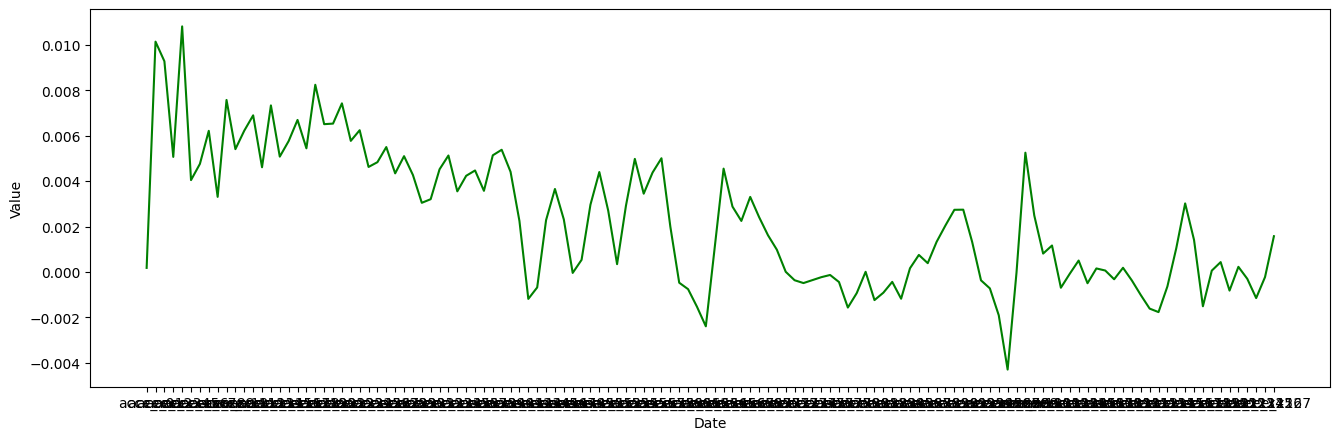

axe : acce_x , fenetre temporelle n :  1


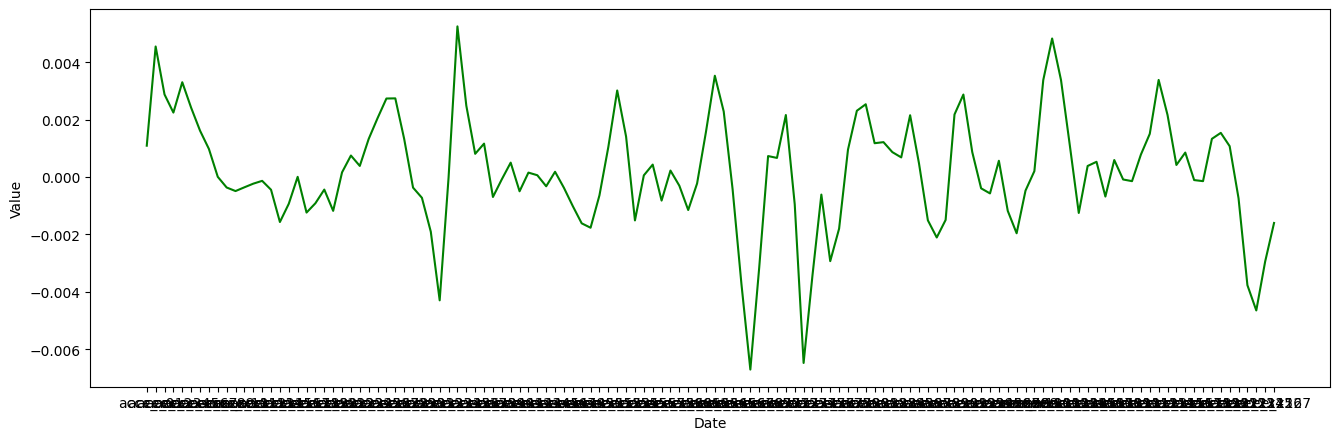

axe : acce_x , fenetre temporelle n :  2


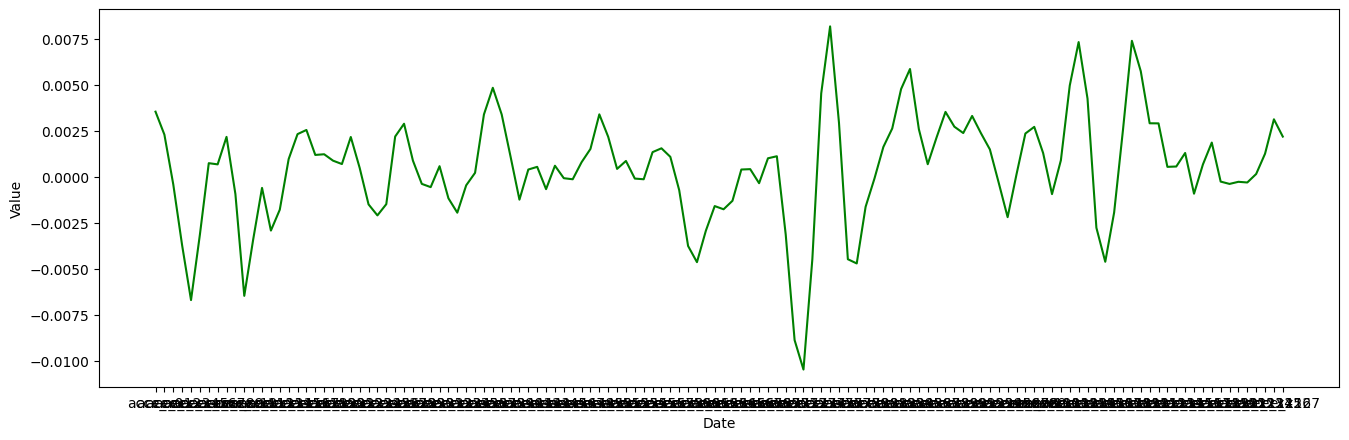

axe : acce_x , fenetre temporelle n :  3


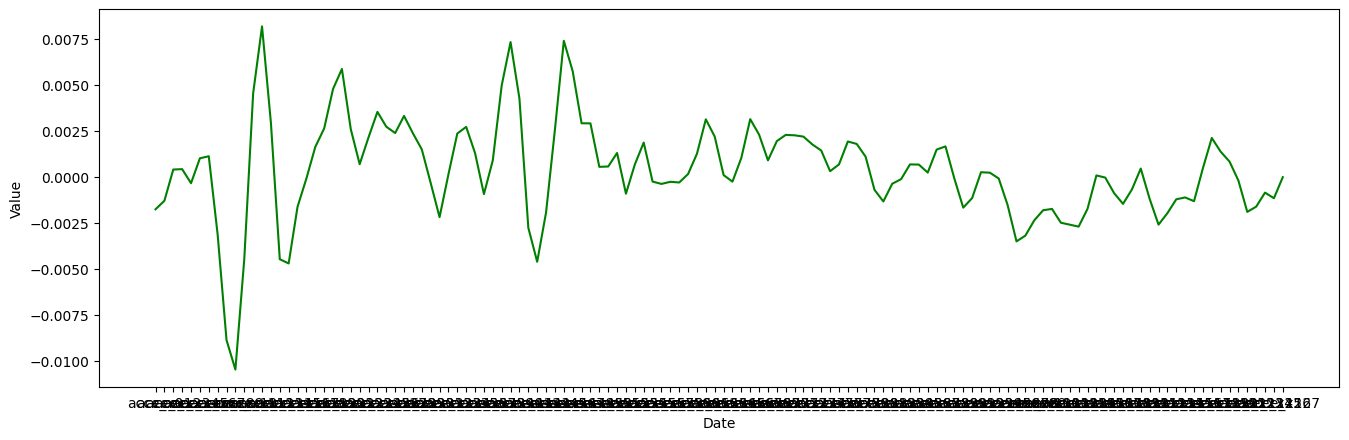

axe : acce_x , fenetre temporelle n :  4


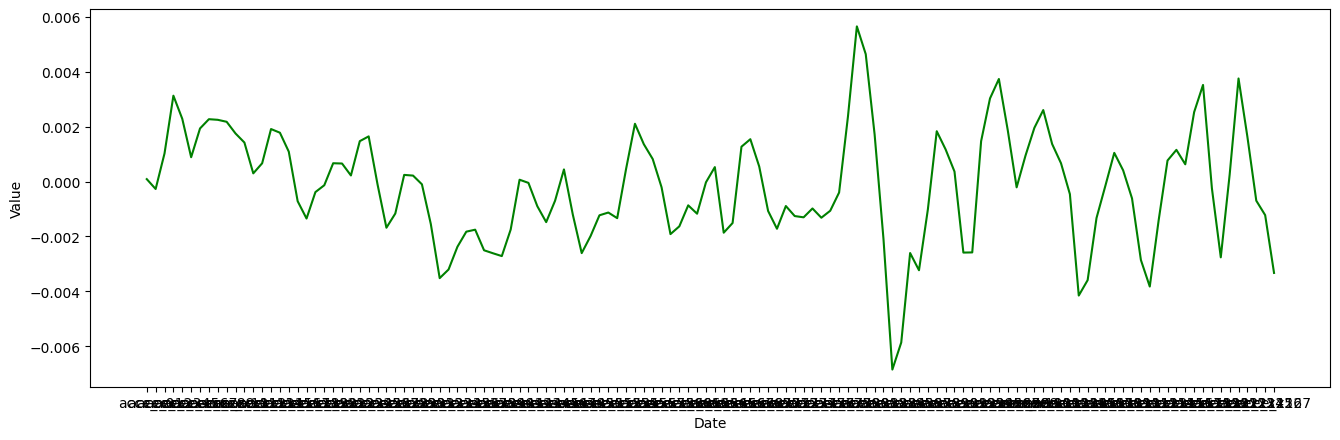

In [65]:
for i in range(0,5):
  print("axe : acce_x , fenetre temporelle n : " ,i  )
  plot_df(acce_x, x=acce_x.columns, y=acce_x.iloc[i])    


# Clustering :

## DF_MEAN : 

### Kmeans & Kmedoides & Timeseries Kmeans :

In [42]:
true_labels = true_labels - 1

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_pred = [0, 1, 0, 1]
y_true = [1, 2, 1, 2]
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))

from sklearn.metrics.cluster import normalized_mutual_info_score

normalized_mutual_info_score(y_pred,y_true)

accuracy(y_pred,y_true)


0.0
0.0


1.0

In [66]:
#----------------------------------------------------------------------

kmeans = KMeans(n_clusters=6, random_state=0).fit(df_mean)
ypred = kmeans.labels_
print(type(ypred))
print("kmeans on df_mean nmi :",normalized_mutual_info_score(true_labels,ypred))
print("kmeans on df_mean accuracy :",accuracy(true_labels,ypred))
print("-------------------------------------------")


#----------------------------------------------------------------------


model = TimeSeriesKMeans(n_clusters=6, metric="softdtw",random_state=0)
model.fit(df_mean)
ypred = model.labels_
print(type(ypred))
print("TimeSeriesKMeans  on df_mean 'softdtw' nmi :",normalized_mutual_info_score(true_labels,ypred))
print("TimeSeriesKMeans  on df_mean 'softdtw'accuracy :",accuracy(true_labels,ypred))

print("-------------------------------------------")

#----------------------------------------------------------------------

model = TimeSeriesKMeans(n_clusters=6, metric="dtw",random_state=0)
model.fit(df_mean)
ypred = model.labels_
print(type(ypred))
print("TimeSeriesKMeans  on df_mean 'dtw' : nmi",normalized_mutual_info_score(true_labels,ypred))
print("TimeSeriesKMeans  on df_mean 'dtw' : accuracy ",accuracy(true_labels,ypred))
print("-------------------------------------------")

#----------------------------------------------------------------------

kmedoids = KMedoids(n_clusters=6, random_state=0).fit(df_mean)
ypred = kmedoids.labels_
print(type(ypred))
print("KMedoides on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("KMedoides on df_mean : accuracy ",accuracy(true_labels,ypred))
print("-------------------------------------------")

#-----------------------------------------------------------------------

fuzzy_kmeans = FCM(n_clusters=6,random_state=0)
fuzzy_kmeans.fit(df_mean.values)
ypred = fuzzy_kmeans.predict(df_mean.values)
print(type(ypred))
print("fuzzy Kmeans on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("fuzzy Kmeans on df_mean : accuracy ",accuracy(true_labels,ypred))


<class 'numpy.ndarray'>
kmeans on df_mean nmi : 0.5869821683852383
kmeans on df_mean accuracy : 0.5648414985590778
-------------------------------------------
<class 'numpy.ndarray'>
TimeSeriesKMeans  on df_mean 'softdtw' nmi : 0.12634084870174045
TimeSeriesKMeans  on df_mean 'softdtw'accuracy : 0.2881844380403458
-------------------------------------------
<class 'numpy.ndarray'>
TimeSeriesKMeans  on df_mean 'dtw' : nmi 0.4314505226053625
TimeSeriesKMeans  on df_mean 'dtw' : accuracy  0.5504322766570605
-------------------------------------------
<class 'numpy.ndarray'>
KMedoides on df_mean : nmi  0.5186268435411503
KMedoides on df_mean : accuracy  0.4668587896253602
-------------------------------------------
<class 'numpy.ndarray'>
fuzzy Kmeans on df_mean : nmi  0.5796004332804008
fuzzy Kmeans on df_mean : accuracy  0.5302593659942363


### CAH :

implementation cah :

In [84]:
#!pip install sktime
from sktime.distances.elastic_cython import dtw_distance

# Italy Power Demand time series are loaded in a pd.Series format.
# The dtw_distance function expects series to be shaped as a (l, m) array, 
# where l=length of series, m=# dimensions           
series_list = df_mean.values
#for i in range(len(series_list)):
 # length = len(series_list[i])
  #series_list[i] = series_list[i].reshape(length, 1)

# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        x = x.reshape(9,1)
        y = series_list[j]
        y = y.reshape(9,1)
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

#--------------------------------------------------------------------
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

#-------------

from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 6, criterion='maxclust')
print(np.unique(cluster_labels))
#------------
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,cluster_labels))
print("cah on df_mean : accuracy ",accuracy(true_labels,cluster_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Cython DTW is deprecated from V0.10


Cah : euclidian distance 

In [67]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
ypred = cluster.fit_predict(df_mean)
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("cah on df_mean : accuracy ",accuracy(true_labels,ypred))

cah on df_mean : nmi  0.5877852383026544
cah on df_mean : accuracy  0.5648414985590778


Cah dtw distance :

In [91]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
ypred = cluster.fit_predict(distance_matrix)
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("cah on df_mean : accuracy ",accuracy(true_labels,ypred))

cah on df_mean : nmi  0.49506330434073875
cah on df_mean : accuracy  0.5561959654178674


## DF_ALL

### PCA :

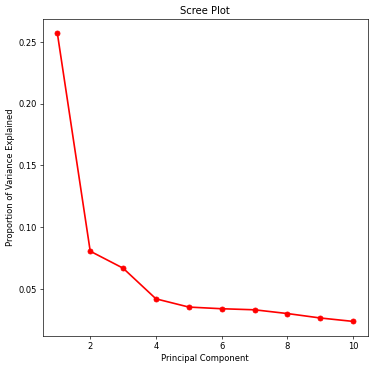

In [107]:
pca = PCA(n_components=10)
df_reduced = pca.fit_transform(df)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### Kmeans & Kmedoides & Timeseries Kmeans :

In [110]:
#----------------------------------------------------------------------

kmeans = KMeans(n_clusters=6, random_state=0).fit(df_reduced)
ypred = kmeans.labels_
print(type(ypred))
print("kmeans on df_mean nmi :",normalized_mutual_info_score(true_labels,ypred))
print("kmeans on df_mean accuracy :",accuracy(true_labels,ypred))
print("-------------------------------------------")


#----------------------------------------------------------------------


model = TimeSeriesKMeans(n_clusters=6, metric="softdtw",random_state=0)
model.fit(df_reduced)
ypred = model.labels_
print(type(ypred))
print("TimeSeriesKMeans  on df_mean 'softdtw' nmi :",normalized_mutual_info_score(true_labels,ypred))
print("TimeSeriesKMeans  on df_mean 'softdtw'accuracy :",accuracy(true_labels,ypred))

print("-------------------------------------------")

#----------------------------------------------------------------------

model = TimeSeriesKMeans(n_clusters=6, metric="dtw",random_state=0)
model.fit(df_reduced)
ypred = model.labels_
print(type(ypred))
print("TimeSeriesKMeans  on df_mean 'dtw' : nmi",normalized_mutual_info_score(true_labels,ypred))
print("TimeSeriesKMeans  on df_mean 'dtw' : accuracy ",accuracy(true_labels,ypred))
print("-------------------------------------------")

#----------------------------------------------------------------------

kmedoids = KMedoids(n_clusters=6, random_state=0).fit(df_reduced)
ypred = kmedoids.labels_
print(type(ypred))
print("KMedoides on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("KMedoides on df_mean : accuracy ",accuracy(true_labels,ypred))
print("-------------------------------------------")

#-----------------------------------------------------------------------

fuzzy_kmeans = FCM(n_clusters=6,random_state=0)
fuzzy_kmeans.fit(df_reduced)
ypred = fuzzy_kmeans.predict(df_reduced)
print(type(ypred))
print("fuzzy Kmeans on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("fuzzy Kmeans on df_mean : accuracy ",accuracy(true_labels,ypred))


<class 'numpy.ndarray'>
kmeans on df_mean nmi : 0.5876595509395419
kmeans on df_mean accuracy : 0.5850144092219021
-------------------------------------------
<class 'numpy.ndarray'>
TimeSeriesKMeans  on df_mean 'softdtw' nmi : 0.5775644013190837
TimeSeriesKMeans  on df_mean 'softdtw'accuracy : 0.5043227665706052
-------------------------------------------
<class 'numpy.ndarray'>
TimeSeriesKMeans  on df_mean 'dtw' : nmi 0.5717269288961
TimeSeriesKMeans  on df_mean 'dtw' : accuracy  0.547550432276657
-------------------------------------------
<class 'numpy.ndarray'>
KMedoides on df_mean : nmi  0.5553594995774834
KMedoides on df_mean : accuracy  0.547550432276657
-------------------------------------------
<class 'numpy.ndarray'>
fuzzy Kmeans on df_mean : nmi  0.6022492733448135
fuzzy Kmeans on df_mean : accuracy  0.5763688760806917


### CAH :

implementation cah :

In [120]:
#!pip install sktime
from sktime.distances.elastic_cython import dtw_distance

# Italy Power Demand time series are loaded in a pd.Series format.
# The dtw_distance function expects series to be shaped as a (l, m) array, 
# where l=length of series, m=# dimensions           
series_list = df_reduced
#for i in range(len(series_list)):
 # length = len(series_list[i])
  #series_list[i] = series_list[i].reshape(length, 1)

# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        x = x.reshape(len(x),1)
        y = series_list[j]
        y = y.reshape(len(y),1)
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

#--------------------------------------------------------------------
# from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

# def hierarchical_clustering(dist_mat, method='complete'):
#     if method == 'complete':
#         Z = complete(distance_matrix)
#     if method == 'single':
#         Z = single(distance_matrix)
#     if method == 'average':
#         Z = average(distance_matrix)
#     if method == 'ward':
#         Z = ward(distance_matrix)
    
#     fig = plt.figure(figsize=(16, 8))
#     dn = dendrogram(Z)
#     plt.title(f"Dendrogram for {method}-linkage with correlation distance")
#     plt.show()
    
#     return Z

# linkage_matrix = hierarchical_clustering(distance_matrix)

# #-------------

# from scipy.cluster.hierarchy import fcluster

# # select maximum number of clusters
# cluster_labels = fcluster(linkage_matrix, 6, criterion='maxclust')
# print(np.unique(cluster_labels))
# #------------
# print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,cluster_labels))
# print("cah on df_mean : accuracy ",accuracy(true_labels,cluster_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Cython DTW is deprecated from V0.10


Cah : euclidian distance 

In [121]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
ypred = cluster.fit_predict(df_reduced)
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("cah on df_mean : accuracy ",accuracy(true_labels,ypred))

cah on df_mean : nmi  0.6032358794744902
cah on df_mean : accuracy  0.5677233429394812


Cah dtw distance :

In [122]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
ypred = cluster.fit_predict(distance_matrix)
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("cah on df_mean : accuracy ",accuracy(true_labels,ypred))

cah on df_mean : nmi  0.6187923142535456
cah on df_mean : accuracy  0.6167146974063401


## DF_ALL (pour chaque variable)

### PCA (pour chaque variable):

In [116]:
pca = PCA(n_components=2)
acce_x_reduced = pd.DataFrame(pca.fit_transform(acce_x))
acce_y_reduced = pd.DataFrame(pca.fit_transform(acce_y))
acce_z_reduced = pd.DataFrame(pca.fit_transform(acce_z))
accm_x_reduced = pd.DataFrame(pca.fit_transform(accm_x))
accm_y_reduced = pd.DataFrame(pca.fit_transform(accm_y))
accm_z_reduced = pd.DataFrame(pca.fit_transform(accm_z))
vit_x_reduced = pd.DataFrame(pca.fit_transform(vit_x))
vit_y_reduced = pd.DataFrame(pca.fit_transform(vit_y))
vit_z_reduced = pd.DataFrame(pca.fit_transform(vit_z))

df2_reduced = pd.concat([acce_x_reduced,acce_y_reduced,acce_z_reduced,accm_x_reduced,accm_y_reduced,accm_z_reduced,vit_x_reduced,vit_y_reduced,vit_z_reduced],axis=1)
#df2_reduced.set_axis(['0', '1', '2','3','4','5','6','7','8'], axis=1)
df2_reduced.set_axis(['0', '1', '2','3','4','5','6','7','8','9','10', '11', '12','13','14','15','16','17'], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.050282,-0.006960,-0.040370,0.015361,-0.184539,-0.039595,-1.800203,0.060961,-0.669540,-0.046038,0.389788,-0.110993,-0.176831,-0.066204,-0.402720,-0.364639,-0.086506,-0.059535
1,0.043833,-0.006147,-0.043174,-0.002837,-0.101143,-0.133612,-1.801875,0.055919,-0.654593,-0.044232,0.358140,-0.096908,-0.075680,0.021823,-0.476969,-0.357814,-0.076915,-0.066472
2,0.041757,-0.011172,-0.061914,0.004967,-0.102744,-0.092631,-1.807330,0.054289,-0.677842,-0.063684,0.312070,-0.089480,0.071413,-0.212696,-0.501287,-0.370941,-0.115564,-0.049700
3,0.045842,-0.013097,-0.039030,0.007727,-0.123088,-0.087267,-1.811989,0.058190,-0.740065,-0.040609,0.252877,-0.108077,0.254821,-0.035026,-0.489996,-0.387375,-0.089711,-0.046801
4,0.051543,-0.009277,-0.035136,-0.002761,-0.127363,-0.092799,-1.810856,0.063947,-0.737181,-0.036242,0.223498,-0.117323,0.186561,0.042285,-0.482567,-0.410198,-0.112537,-0.075973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,-2.008647,1.436445,-0.201102,1.314231,-1.117197,0.142359,-1.437644,-1.994469,-2.445018,-0.205533,-2.016488,-1.148702,1.881378,4.847716,-2.625378,0.412095,1.142551,2.270028
343,-2.486842,-1.765548,0.970432,0.434615,-1.272691,-0.308411,-1.240018,-2.464121,-2.343936,0.961140,-1.981991,-1.275935,-1.338141,-4.474050,-3.558985,-2.200643,2.976657,-1.381087
344,1.708233,-1.842666,0.248837,-0.784417,-0.541114,-0.669434,-1.212845,1.721701,-2.414316,0.237916,-1.759024,-0.566728,3.410870,1.786635,-1.281206,-3.129961,-2.111970,-2.432511
345,1.270670,2.492612,-0.672599,0.114362,0.550158,-0.477616,-1.567789,1.273584,-2.143373,-0.681960,-1.643106,0.516872,-2.844812,3.256908,1.474324,-2.195211,-1.482215,3.012231


### Kmeans & Kmedoides & Timeseries Kmeans :

In [117]:
#----------------------------------------------------------------------

kmeans = KMeans(n_clusters=6, random_state=0).fit(df2_reduced)
ypred = kmeans.labels_
print(type(ypred))
print("kmeans on df_mean nmi :",normalized_mutual_info_score(true_labels,ypred))
print("kmeans on df_mean accuracy :",accuracy(true_labels,ypred))
print("-------------------------------------------")


#----------------------------------------------------------------------


model = TimeSeriesKMeans(n_clusters=6, metric="softdtw",random_state=0)
model.fit(df2_reduced)
ypred = model.labels_
print(type(ypred))
print("TimeSeriesKMeans  on df_mean 'softdtw' nmi :",normalized_mutual_info_score(true_labels,ypred))
print("TimeSeriesKMeans  on df_mean 'softdtw'accuracy :",accuracy(true_labels,ypred))

print("-------------------------------------------")

#----------------------------------------------------------------------

model = TimeSeriesKMeans(n_clusters=6, metric="dtw",random_state=0)
model.fit(df2_reduced)
ypred = model.labels_
print(type(ypred))
print("TimeSeriesKMeans  on df_mean 'dtw' : nmi",normalized_mutual_info_score(true_labels,ypred))
print("TimeSeriesKMeans  on df_mean 'dtw' : accuracy ",accuracy(true_labels,ypred))
print("-------------------------------------------")

#----------------------------------------------------------------------

kmedoids = KMedoids(n_clusters=6, random_state=0).fit(df2_reduced)
ypred = kmedoids.labels_
print(type(ypred))
print("KMedoides on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("KMedoides on df_mean : accuracy ",accuracy(true_labels,ypred))
print("-------------------------------------------")

#-----------------------------------------------------------------------

fuzzy_kmeans = FCM(n_clusters=6,random_state=0)
fuzzy_kmeans.fit(df2_reduced.values)
ypred = fuzzy_kmeans.predict(df2_reduced.values)
print(type(ypred))
print("fuzzy Kmeans on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("fuzzy Kmeans on df_mean : accuracy ",accuracy(true_labels,ypred))


<class 'numpy.ndarray'>
kmeans on df_mean nmi : 0.554913062314965
kmeans on df_mean accuracy : 0.5302593659942363
-------------------------------------------
<class 'numpy.ndarray'>
TimeSeriesKMeans  on df_mean 'softdtw' nmi : 0.5142619098143615
TimeSeriesKMeans  on df_mean 'softdtw'accuracy : 0.5331412103746398
-------------------------------------------
<class 'numpy.ndarray'>
TimeSeriesKMeans  on df_mean 'dtw' : nmi 0.6291152349479214
TimeSeriesKMeans  on df_mean 'dtw' : accuracy  0.7118155619596542
-------------------------------------------
<class 'numpy.ndarray'>
KMedoides on df_mean : nmi  0.5661229219548469
KMedoides on df_mean : accuracy  0.5677233429394812
-------------------------------------------
<class 'numpy.ndarray'>
fuzzy Kmeans on df_mean : nmi  0.595914272662948
fuzzy Kmeans on df_mean : accuracy  0.590778097982709


### CAH :

implementation cah :

In [124]:
#!pip install sktime
from sktime.distances.elastic_cython import dtw_distance

# Italy Power Demand time series are loaded in a pd.Series format.
# The dtw_distance function expects series to be shaped as a (l, m) array, 
# where l=length of series, m=# dimensions           
series_list = df2_reduced.values
#for i in range(len(series_list)):
 # length = len(series_list[i])
  #series_list[i] = series_list[i].reshape(length, 1)

# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        x = x.reshape(len(x),1)
        y = series_list[j]
        y = y.reshape(len(y),1)
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

#--------------------------------------------------------------------
# from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

# def hierarchical_clustering(dist_mat, method='complete'):
#     if method == 'complete':
#         Z = complete(distance_matrix)
#     if method == 'single':
#         Z = single(distance_matrix)
#     if method == 'average':
#         Z = average(distance_matrix)
#     if method == 'ward':
#         Z = ward(distance_matrix)
    
#     fig = plt.figure(figsize=(16, 8))
#     dn = dendrogram(Z)
#     plt.title(f"Dendrogram for {method}-linkage with correlation distance")
#     plt.show()
    
#     return Z

# linkage_matrix = hierarchical_clustering(distance_matrix)

# #-------------

# from scipy.cluster.hierarchy import fcluster

# # select maximum number of clusters
# cluster_labels = fcluster(linkage_matrix, 6, criterion='maxclust')
# print(np.unique(cluster_labels))
# #------------
# print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,cluster_labels))
# print("cah on df_mean : accuracy ",accuracy(true_labels,cluster_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Cython DTW is deprecated from V0.10


Cah : euclidian distance 

In [125]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
ypred = cluster.fit_predict(df2_reduced)
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("cah on df_mean : accuracy ",accuracy(true_labels,ypred))

cah on df_mean : nmi  0.5781050845689976
cah on df_mean : accuracy  0.5360230547550432


Cah dtw distance :

In [126]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete')
ypred = cluster.fit_predict(distance_matrix)
print("cah on df_mean : nmi ",normalized_mutual_info_score(true_labels,ypred))
print("cah on df_mean : accuracy ",accuracy(true_labels,ypred))

cah on df_mean : nmi  0.5788267014516226
cah on df_mean : accuracy  0.6282420749279539


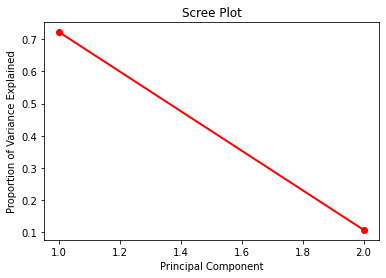

In [ ]:
df1 = df_mean.drop (['lab0'],axis=1)

pca = PCA(n_components=2)
df1_reduced = pca.fit_transform(df1)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=2)
acce_x_reduced = pd.DataFrame(pca.fit_transform(acce_x))
acce_y_reduced = pd.DataFrame(pca.fit_transform(acce_y))
acce_z_reduced = pd.DataFrame(pca.fit_transform(acce_z))
accm_x_reduced = pd.DataFrame(pca.fit_transform(accm_x))
accm_y_reduced = pd.DataFrame(pca.fit_transform(accm_y))
accm_z_reduced = pd.DataFrame(pca.fit_transform(accm_z))
vit_x_reduced = pd.DataFrame(pca.fit_transform(vit_x))
vit_y_reduced = pd.DataFrame(pca.fit_transform(vit_y))
vit_z_reduced = pd.DataFrame(pca.fit_transform(vit_z))



In [ ]:
print(type(acce_x_reduced))

df2_reduced = pd.concat([acce_x_reduced,acce_y_reduced,acce_z_reduced,accm_x_reduced,accm_y_reduced,accm_z_reduced,vit_x_reduced,vit_y_reduced,vit_z_reduced],axis=1)
df2_reduced

<class 'pandas.core.frame.DataFrame'>


,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
0,0.050282,-0.006960,-0.040370,0.015361,-0.184539,-0.039595,-1.800203,0.060961,-0.669540,-0.046038,0.389788,-0.110993,-0.176831,-0.066204,-0.402720,-0.364639,-0.086506,-0.059535
1,0.043833,-0.006147,-0.043174,-0.002837,-0.101143,-0.133612,-1.801875,0.055919,-0.654593,-0.044232,0.358140,-0.096908,-0.075680,0.021823,-0.476969,-0.357814,-0.076915,-0.066472
2,0.041757,-0.011172,-0.061914,0.004967,-0.102744,-0.092631,-1.807330,0.054289,-0.677842,-0.063684,0.312070,-0.089480,0.071413,-0.212696,-0.501287,-0.370941,-0.115564,-0.049700
3,0.045842,-0.013097,-0.039030,0.007727,-0.123088,-0.087267,-1.811989,0.058190,-0.740065,-0.040609,0.252877,-0.108077,0.254821,-0.035026,-0.489996,-0.387375,-0.089711,-0.046801
4,0.051543,-0.009277,-0.035136,-0.002761,-0.127363,-0.092799,-1.810856,0.063947,-0.737181,-0.036242,0.223498,-0.117323,0.186561,0.042285,-0.482567,-0.410198,-0.112537,-0.075973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,-2.008647,1.436445,-0.201102,1.314231,-1.117197,0.142359,-1.437644,-1.994469,-2.445018,-0.205533,-2.016488,-1.148702,1.881378,4.847716,-2.625378,0.412095,1.142551,2.270028
343,-2.486842,-1.765548,0.970432,0.434615,-1.272691,-0.308411,-1.240018,-2.464121,-2.343936,0.961140,-1.981991,-1.275935,-1.338141,-4.474050,-3.558985,-2.200643,2.976657,-1.381087
344,1.708233,-1.842666,0.248837,-0.784417,-0.541114,-0.669434,-1.212845,1.721701,-2.414316,0.237916,-1.759024,-0.566728,3.410870,1.786635,-1.281206,-3.129961,-2.111970,-2.432511
345,1.270670,2.492612,-0.672599,0.114362,0.550158,-0.477616,-1.567789,1.273584,-2.143373,-0.681960,-1.643106,0.516872,-2.844812,3.256908,1.474324,-2.195211,-1.482215,3.012231


In [ ]:
df2_reduced.set_axis(['0', '1', '2','3','4','5','6','7','8','9','10', '11', '12','13','14','15','16','17'], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.050282,-0.006960,-0.040370,0.015361,-0.184539,-0.039595,-1.800203,0.060961,-0.669540,-0.046038,0.389788,-0.110993,-0.176831,-0.066204,-0.402720,-0.364639,-0.086506,-0.059535
1,0.043833,-0.006147,-0.043174,-0.002837,-0.101143,-0.133612,-1.801875,0.055919,-0.654593,-0.044232,0.358140,-0.096908,-0.075680,0.021823,-0.476969,-0.357814,-0.076915,-0.066472
2,0.041757,-0.011172,-0.061914,0.004967,-0.102744,-0.092631,-1.807330,0.054289,-0.677842,-0.063684,0.312070,-0.089480,0.071413,-0.212696,-0.501287,-0.370941,-0.115564,-0.049700
3,0.045842,-0.013097,-0.039030,0.007727,-0.123088,-0.087267,-1.811989,0.058190,-0.740065,-0.040609,0.252877,-0.108077,0.254821,-0.035026,-0.489996,-0.387375,-0.089711,-0.046801
4,0.051543,-0.009277,-0.035136,-0.002761,-0.127363,-0.092799,-1.810856,0.063947,-0.737181,-0.036242,0.223498,-0.117323,0.186561,0.042285,-0.482567,-0.410198,-0.112537,-0.075973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,-2.008647,1.436445,-0.201102,1.314231,-1.117197,0.142359,-1.437644,-1.994469,-2.445018,-0.205533,-2.016488,-1.148702,1.881378,4.847716,-2.625378,0.412095,1.142551,2.270028
343,-2.486842,-1.765548,0.970432,0.434615,-1.272691,-0.308411,-1.240018,-2.464121,-2.343936,0.961140,-1.981991,-1.275935,-1.338141,-4.474050,-3.558985,-2.200643,2.976657,-1.381087
344,1.708233,-1.842666,0.248837,-0.784417,-0.541114,-0.669434,-1.212845,1.721701,-2.414316,0.237916,-1.759024,-0.566728,3.410870,1.786635,-1.281206,-3.129961,-2.111970,-2.432511
345,1.270670,2.492612,-0.672599,0.114362,0.550158,-0.477616,-1.567789,1.273584,-2.143373,-0.681960,-1.643106,0.516872,-2.844812,3.256908,1.474324,-2.195211,-1.482215,3.012231
